# MID TERM PROJECT

INTRODUCTION TO ELECTROCARDIOGRAM

ECG is a plot depicting electrical activity of human heart. Ecg is an important tool in diagonsis as it is used to detect various health disorders like arythmia etc. 

The change in electrical potential difference during depolarisation and repolarisation of myocardial fibers are recorded by electrodes positioned on the surface of the chest and the limb. 

The objective of ECG signal processing is manifold and comprises the improvement of measurement accuracy and the extraction of information is not readily available from the signal through visual assessment.The ECG is signal needs to be filtered and features need to be extracted to get valuable inforation out of it. Here for our midterm project, we will be performing operation with "aami3a.dat" signal

The first part is to plot the signal against time.

<IPython.core.display.Javascript object>


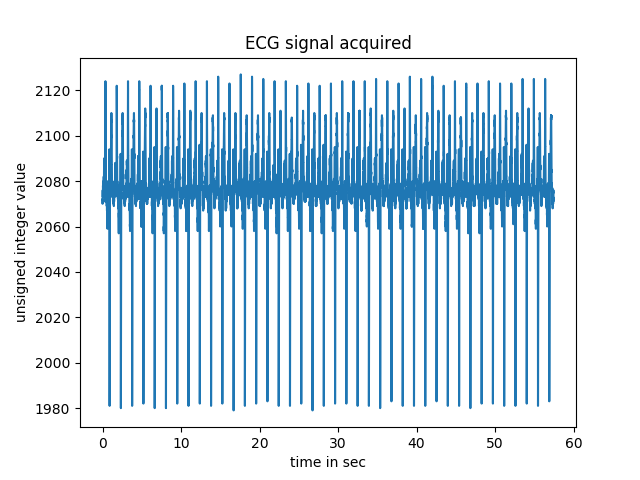

In [7]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import scipy as Sci
import numpy as np
import pylab as pl
import scipy.linalg



file_f=open('aami3a.dat','rb')
data_array=np.fromfile(file_f,count=-1,dtype=np.uint16)
t=np.arange(0,43081/750.,1/750.)
plt.plot(t,data_array)
plt.title('ECG signal acquired')
plt.ylabel('unsigned integer value')
plt.xlabel('time in sec')



Now after plotting the signal the next step is to calculate no. of samples needed to plot 5 cardiac cycles.On average a human being has heart rate between 60 to 100 bpm.
so we will calculate for 60, 70, 80, 90, 100.
No. of samples required is= frequency*no.of cardiac cycles*beats per second

for 60 bpm, no. of samples=750*5*(60/60)=3750 samples
for 70 bpm, no. of samples=750*5*(70/60)=4375 samples
for 80 bpm, no. of samples=750*5*(80/60)=5000 samples
for 90 bpm, no. of samples=750*5*(90/60)=5625 samples
for 100 bmn,no. of samples=750*5*(100/60)=6250 samples

Now considering the person has heart rate of 60 bpm, we plot the cardiac cycles

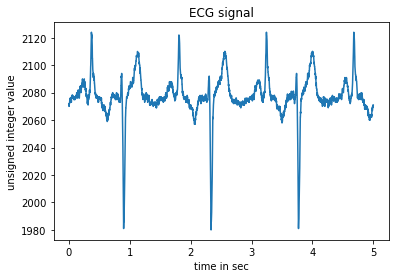

In [3]:
%matplotlib inline
plt.plot(t[:3750],data_array[:3750])
plt.title('ECG signal')
plt.xlabel('time in sec')
plt.ylabel('unsigned integer value')

As it can observed from the plot above that it doesnot contain full 5 cardiac cycles, that implies that the heart rate of the person is below 60 bpm. 

By plotting for all values between 80 to 90, we decided on 86 bpm as 5 cardiac cycles can be easily observed in the plot with 86 bpm.
No. of samples= 750*5*(86/60)=5375 samples.



<IPython.core.display.Javascript object>


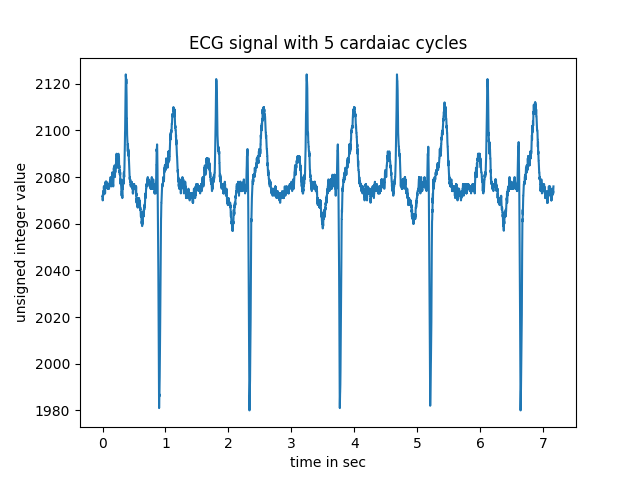

In [8]:
%matplotlib nbagg
plt.plot(t[:5375],data_array[:5375])
plt.title('ECG signal with 5 cardaiac cycles')
plt.xlabel('time in sec')
plt.ylabel('unsigned integer value')

It can be observed that 5 cycle complete in 7 seconds so heart rate is 0.71 beats per second or 42.8 beats per minute

other way to estimate heart rate is calculate no. of peaks in our signal i.e. 40 so we have 40 cardiac cycles in 57.44 seconds which implies 0.69 cardiac cycle completes in 1 seconds. so no. of beats per minute is 0.69*60=41.78

Next step is calculate Fourier transform and plot the spectrum and also calculate the value of frequency where maximum value is observed.

maximum value is observed at frequency = [ 1.39272533]


<IPython.core.display.Javascript object>


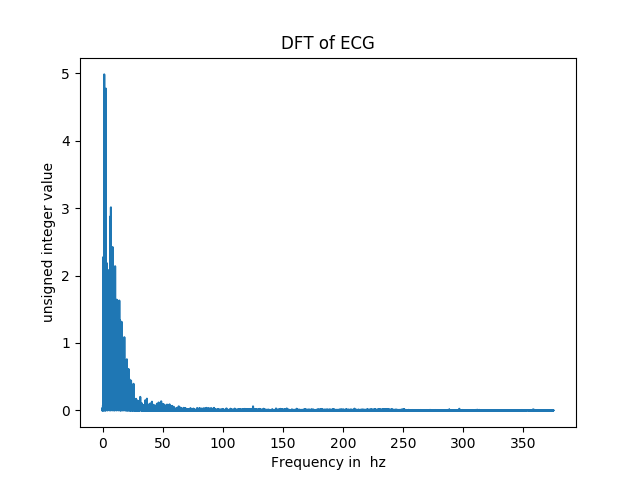

In [14]:
%matplotlib nbagg
f=np.arange(0,750/2.,750/43081.)
data_nodc=data_array-np.mean(data_array)
out=np.fft.fft(data_nodc)
length=len(data_nodc)
data_fft=abs(out)/length
maxima=0
i=0;
while i<length :
 if data_fft[i]>maxima :
       maxima=data_fft[i]
 i=i+1
index=np.where(data_fft==maxima)
inx=length-index[0]
print('maximum value is observed at frequency = '+str(f[inx]))
plt.plot(f,data_fft[:len(f)])
plt.xlabel('Frequency in  hz')
plt.ylabel('unsigned integer value')
plt.title('DFT of ECG')

We observed the maxmima or peak at 1.39 hz so the heart rate is 60/1.39 = 43.1 beats per minute.

Now we will design a low pass butterwoth filter of order 4 and will cut frequencies above 100 hz

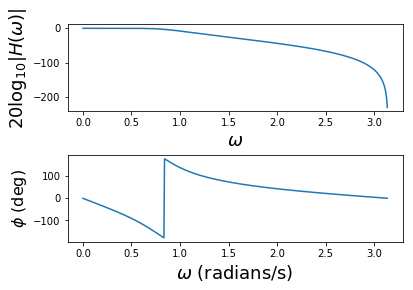

In [12]:
%matplotlib inline
from __future__ import division
from scipy import signal
cutoff=100/375
#print(cutoff)
b, a = signal.butter(4,cutoff,btype='low', output='ba')
w, h = signal.freqz(b, a)
plt.subplots_adjust( hspace = .5 )
#print(b,a)
plt.subplot(211)
plt.plot(w,20*np.log10(abs(h)))
plt.ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
plt.xlabel(r"$\omega$",fontsize=18)
plt.subplot(212)
plt.plot(w,np.angle(h)/np.pi*180)
plt.xlabel(r'$\omega$ (radians/s)',fontsize=18)
plt.ylabel(r"$\phi $ (deg)",fontsize=16)

Now we will filter our signal and calculate DFT of filtered signal and finally plot the spectrum

<IPython.core.display.Javascript object>


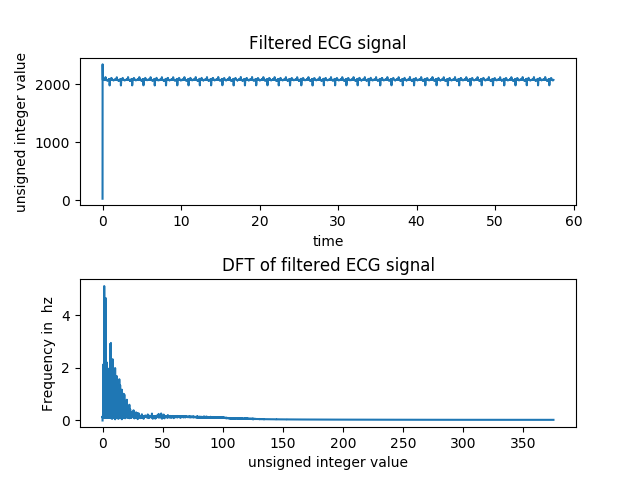

maximum value is observed at frequency = [ 1.39272533]


In [13]:
%matplotlib nbagg
plt.subplots_adjust( hspace = .5 )
filtered=signal.lfilter(b,a,data_array)
plt.subplot(211)
plt.plot(t,filtered)
plt.title('Filtered ECG signal')
plt.xlabel('time')
plt.ylabel('unsigned integer value')
filtered_nodc=filtered-np.mean(filtered)
Y=np.fft.fft(filtered_nodc)
l=len(filtered)
filtered_fft=abs(Y)/l
maxima=0
i=0;
while i<l :
 if filtered_fft[i]>maxima :
       maxima=filtered_fft[i]
 i=i+1
index=np.where(filtered_fft==maxima)
inx=l-index[0]
print('maximum value is observed at frequency = '+str(f[inx]))
plt.subplot(212)
plt.plot(f,filtered_fft[:len(f)])
plt.xlabel('Frequency in  hz')
plt.ylabel('unsigned integer value')
plt.title('DFT of filtered ECG signal')


The peak is observed at the same old value i.e. 1.39 hz. Hence our filter didnt change the heart rate because the filter didnot change the amplitude of frequencies below 100 hz.
Also the filtered signal before DFT has very small amplitude but that didnot change the value of heart rate calculate after performing DFT on filtered signal. 

REFERENCES:
* Proakis, John G. ,Digital signal processing: principles algorithms and applications. Pearson Education India, 2001.
* Gacek, Adam, Pedrycz, Witold, ECG Signal Processing, Classification and Interpretation.Springer Science & Business Media,2011.


